# **Import Libraries**

In [42]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

# **Load and Check Data**

In [43]:
df = pd.read_csv("/content/sample_data/heart_statlog_cleveland_hungary_final.csv")

# Check The Dataset

In [44]:
def check_df(dframe):
  print("##################################### Shape #####################################")
  print("")
  print(dframe.shape)
  print("")
  print("##################################### Columns #####################################")
  print("")
  print(dframe.columns)
  print("")
  print("##################################### Info #####################################")
  print("")
  dframe.info()
  print("")
  print("##################################### Types #####################################")
  print("")
  print(dframe.dtypes)
  print("")
  print("##################################### Head #####################################")
  print("")
  print(dframe.head())
  print("")
  print("##################################### Tail #####################################")
  print("")
  print(dframe.tail())
  print("")
  print("##################################### NA #####################################")
  print("")
  print(dframe.isnull().sum())


In [45]:
check_df(df)

##################################### Shape #####################################

(1190, 12)

##################################### Columns #####################################

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

##################################### Info #####################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting e

In [46]:
# Examining the basic statistical values ​​of the data set
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


**Detection of categoric , numeric and cardinal values**

In [47]:
def column_detection(dataframe: pd.DataFrame, cat_th: int=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=="0"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                dataframe[col].dtypes != "0" ]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()> car_th and
                 dataframe[col].dtypes =="0"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes !="0"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print("\n############################## Categoric ##############################")
  print(cat_cols)
  print("\n############################## Numeric ##############################")
  print(num_cols)
  print("\n############################## Categoric But Cardinal ##############################")
  print(cat_but_car)
  print("\n############################## Numeric But Categoric ##############################")
  print(num_but_cat)
  print("\n############################## Columns Overview ##############################")
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car, num_but_cat


In [48]:
cat_cols, num_cols, cat_but_car, num_but_cat =column_detection(df)


############################## Categoric ##############################
['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']

############################## Numeric ##############################
['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

############################## Categoric But Cardinal ##############################
[]

############################## Numeric But Categoric ##############################
['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']

############################## Columns Overview ##############################
Observations: 1190
Variables: 12
cat_cols: 7
num_cols: 5
cat_but_car: 0
num_but_cat: 7


# **Visualization of categorical and numerical values**



############################## Categorical Features ##############################


     sex      Ratio
sex                
1    909  76.386555
0    281  23.613445


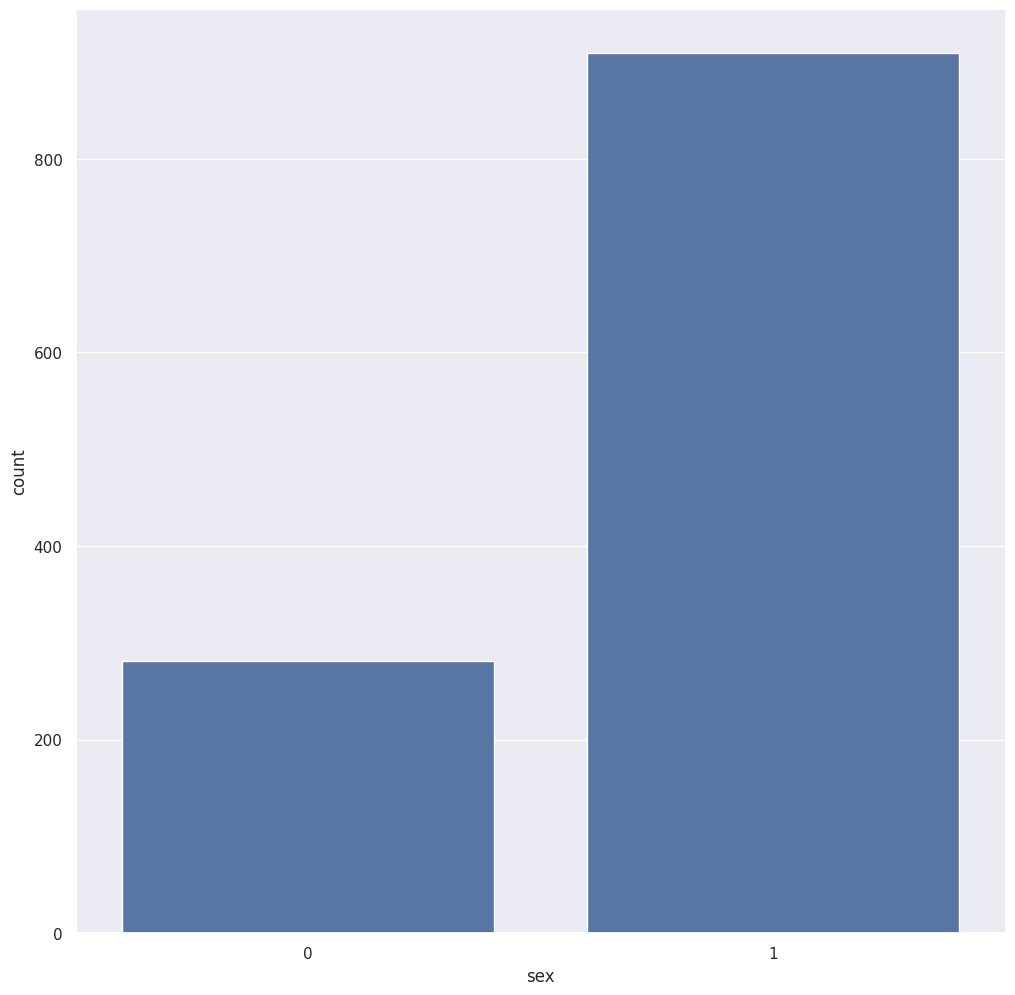



                 chest pain type      Ratio
chest pain type                            
4                            625  52.521008
3                            283  23.781513
2                            216  18.151261
1                             66   5.546218


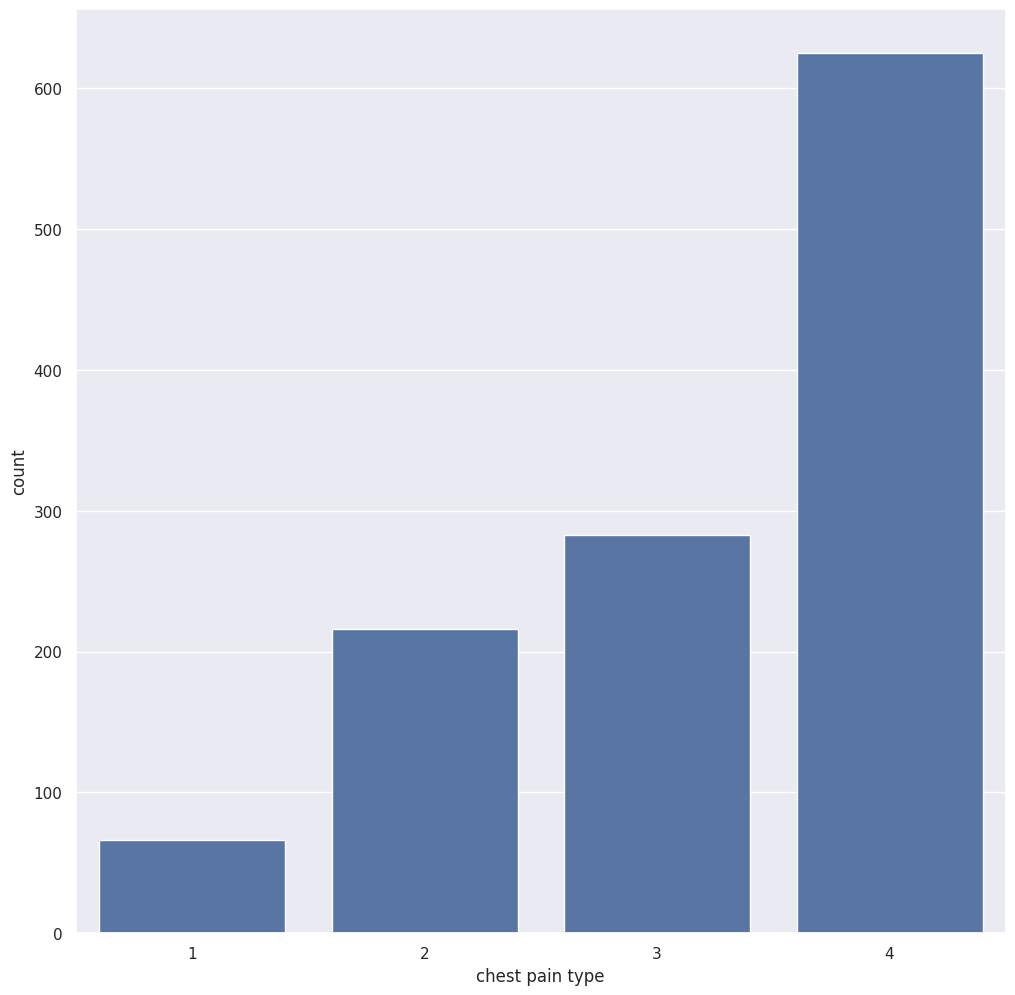



                     fasting blood sugar      Ratio
fasting blood sugar                                
0                                    936  78.655462
1                                    254  21.344538


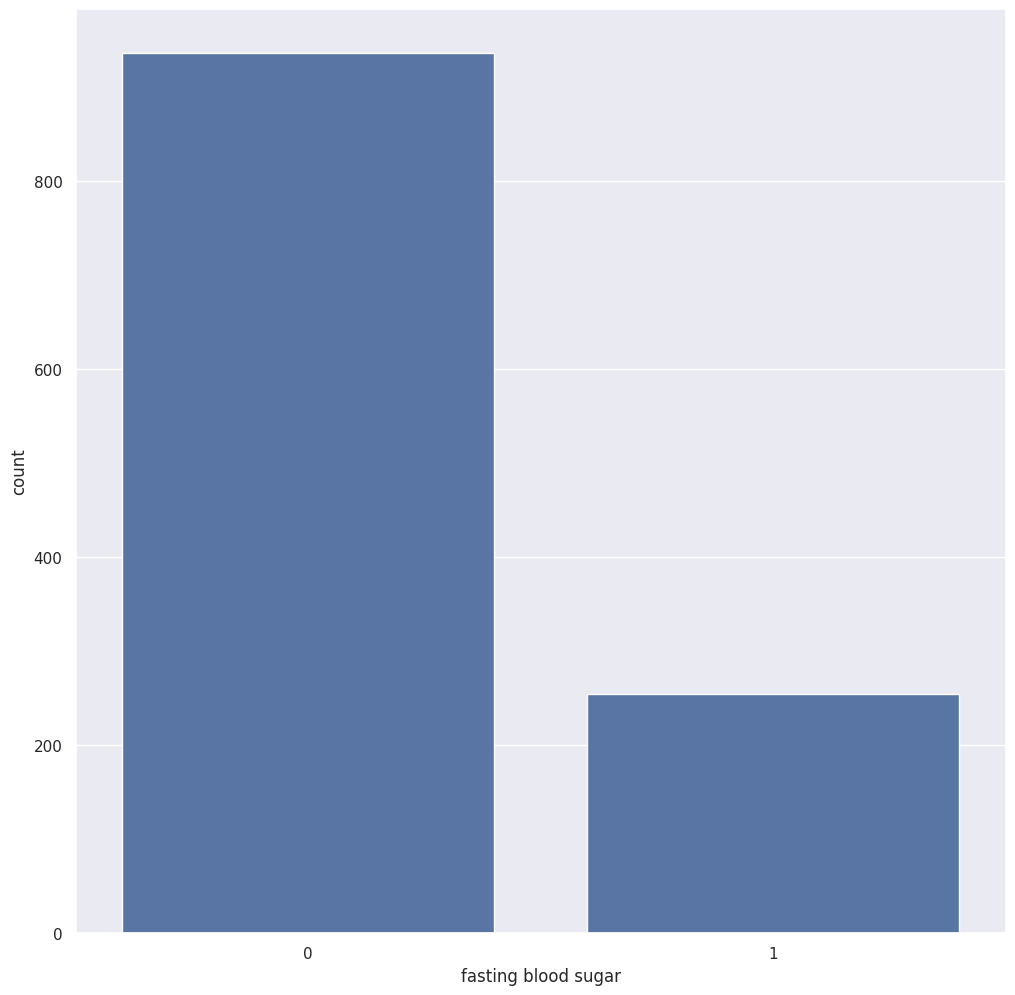



             resting ecg      Ratio
resting ecg                        
0                    684  57.478992
2                    325  27.310924
1                    181  15.210084


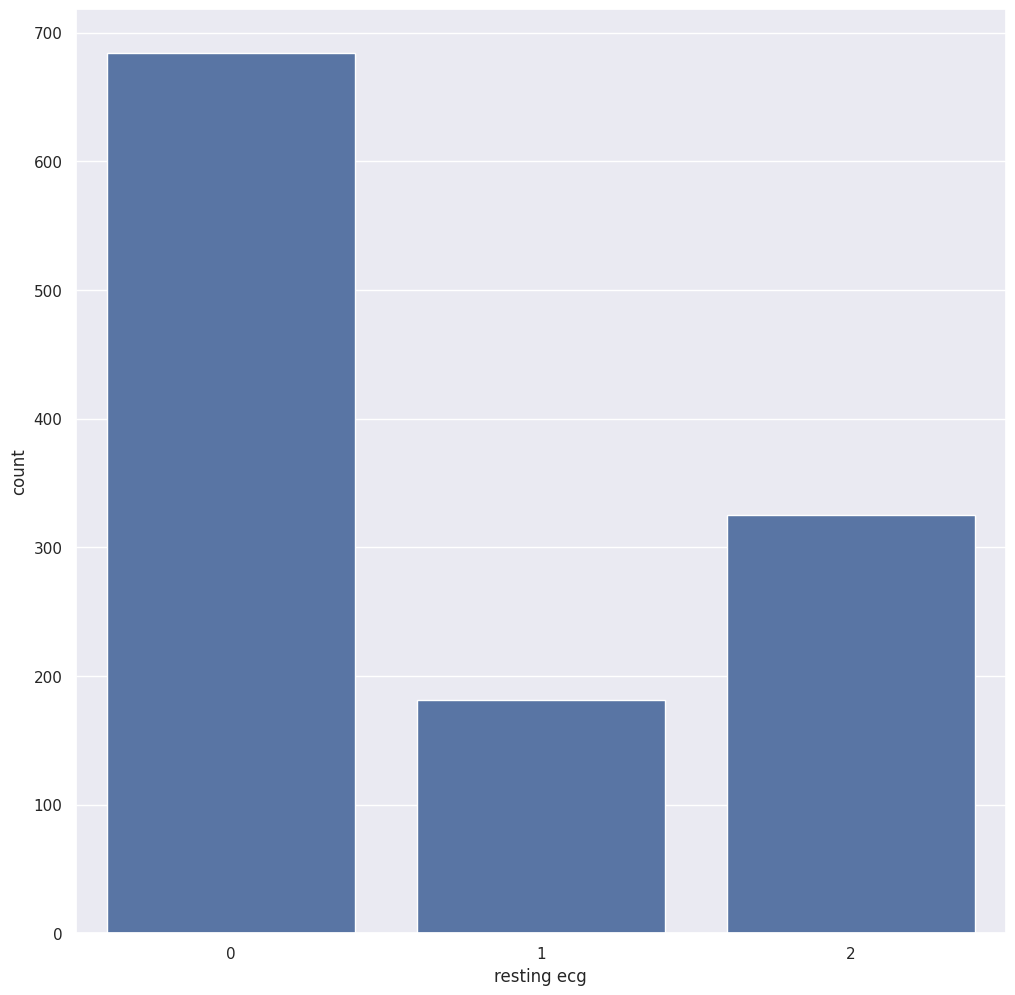



                 exercise angina      Ratio
exercise angina                            
0                            729  61.260504
1                            461  38.739496


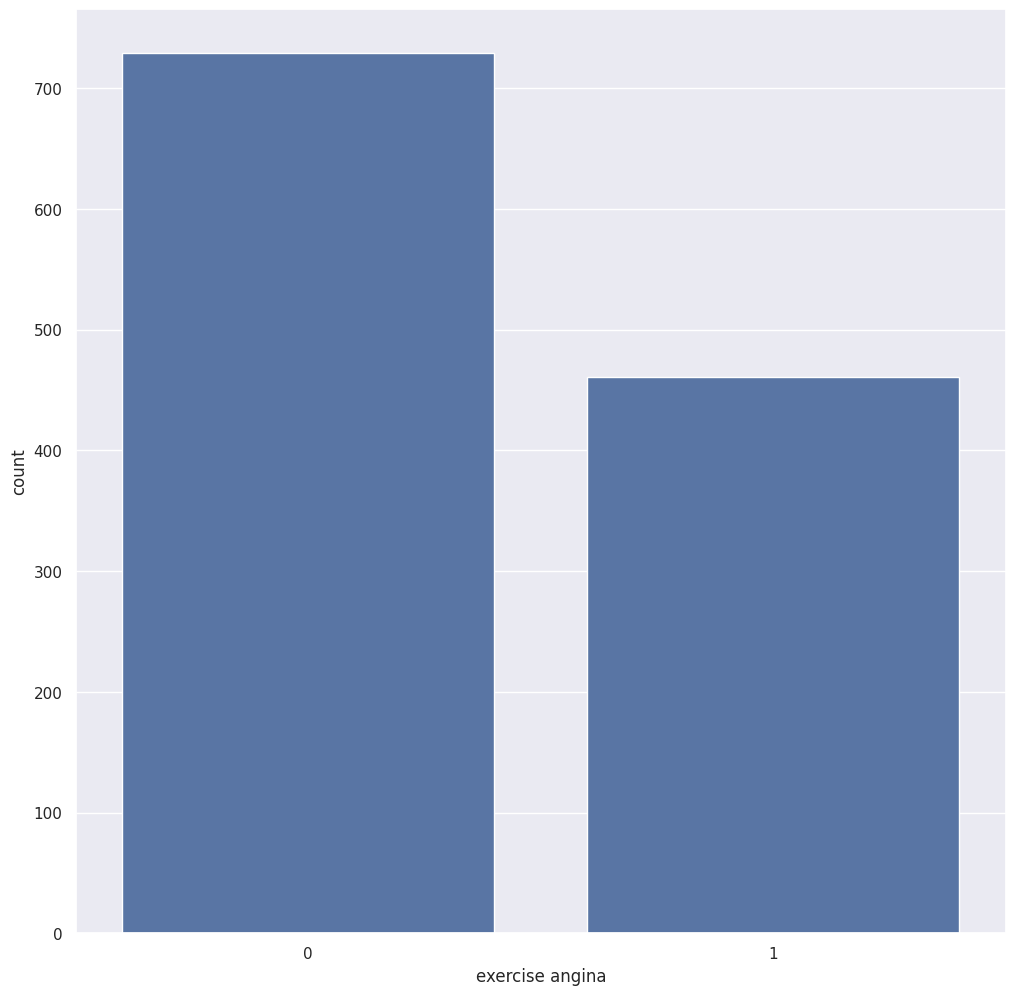



          ST slope      Ratio
ST slope                     
2              582  48.907563
1              526  44.201681
3               81   6.806723
0                1   0.084034


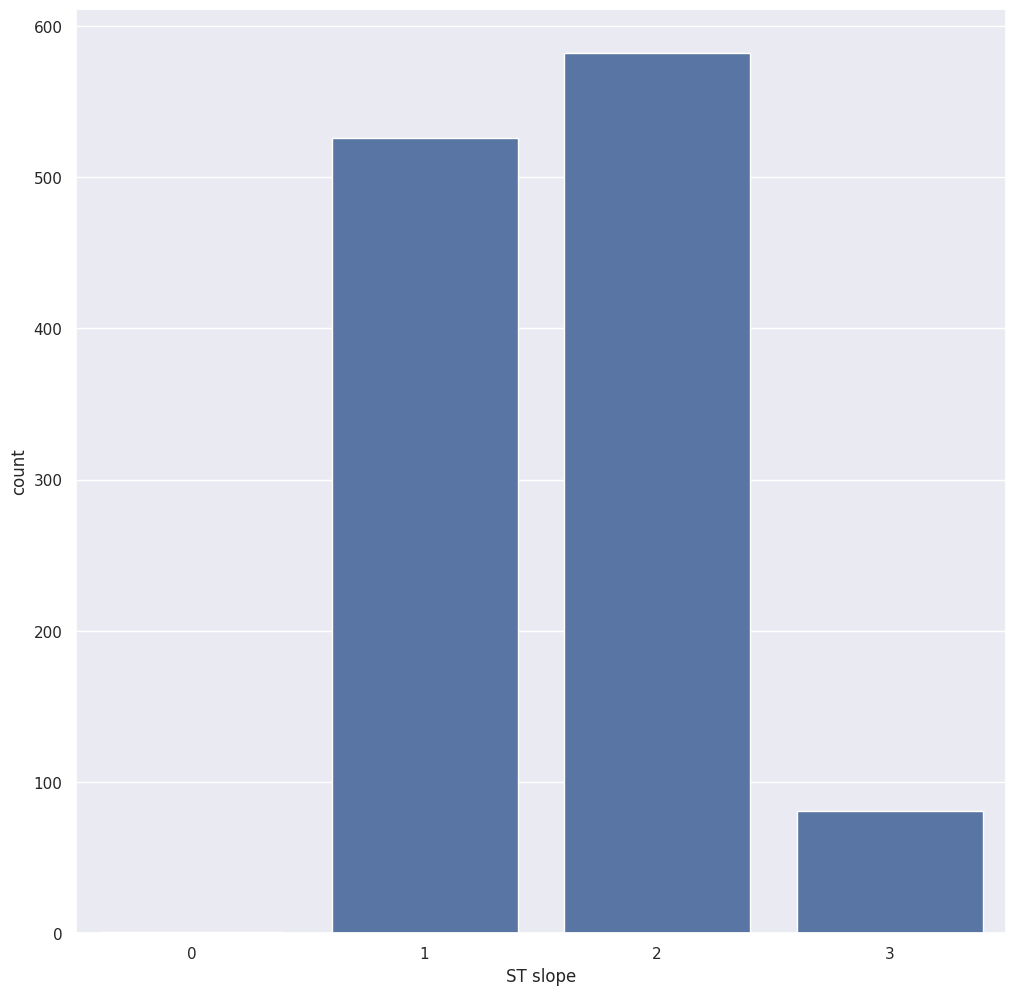



        target      Ratio
target                   
1          629  52.857143
0          561  47.142857


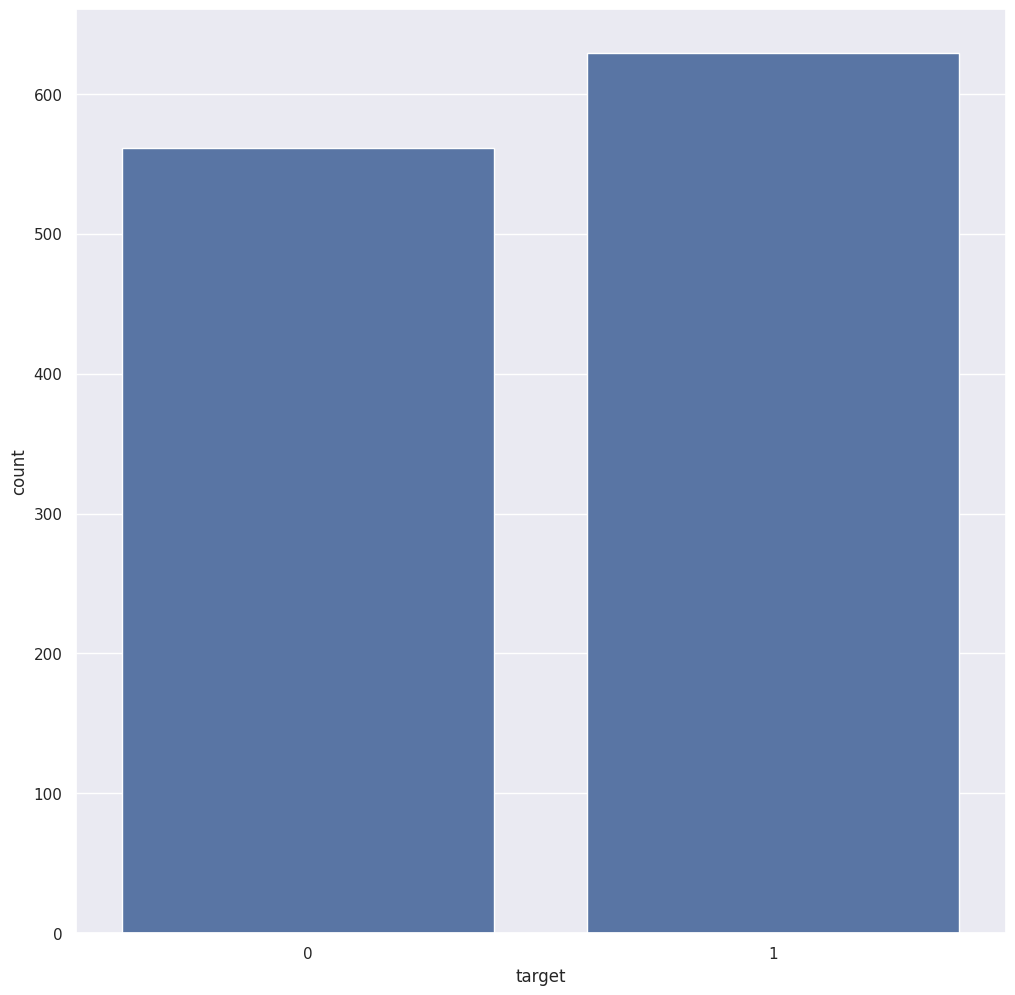





############################## Numerical Features ##############################




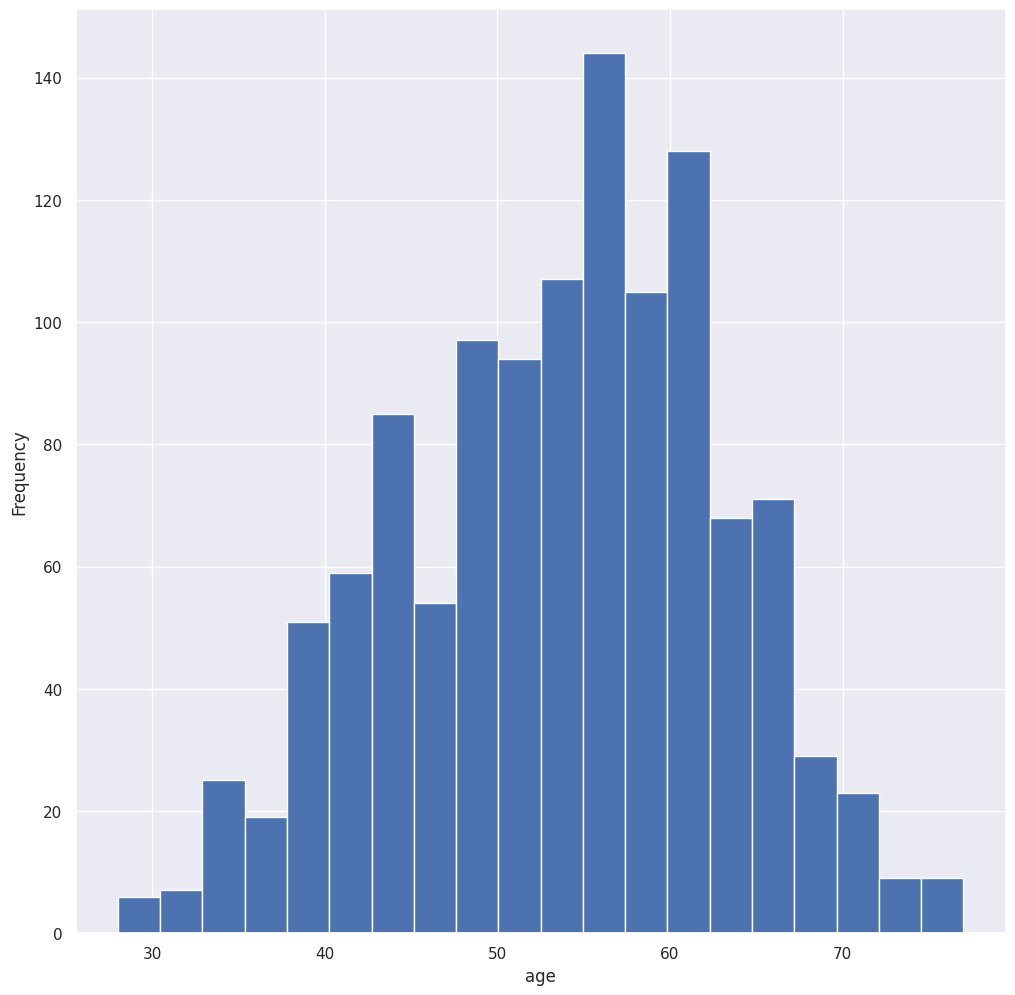

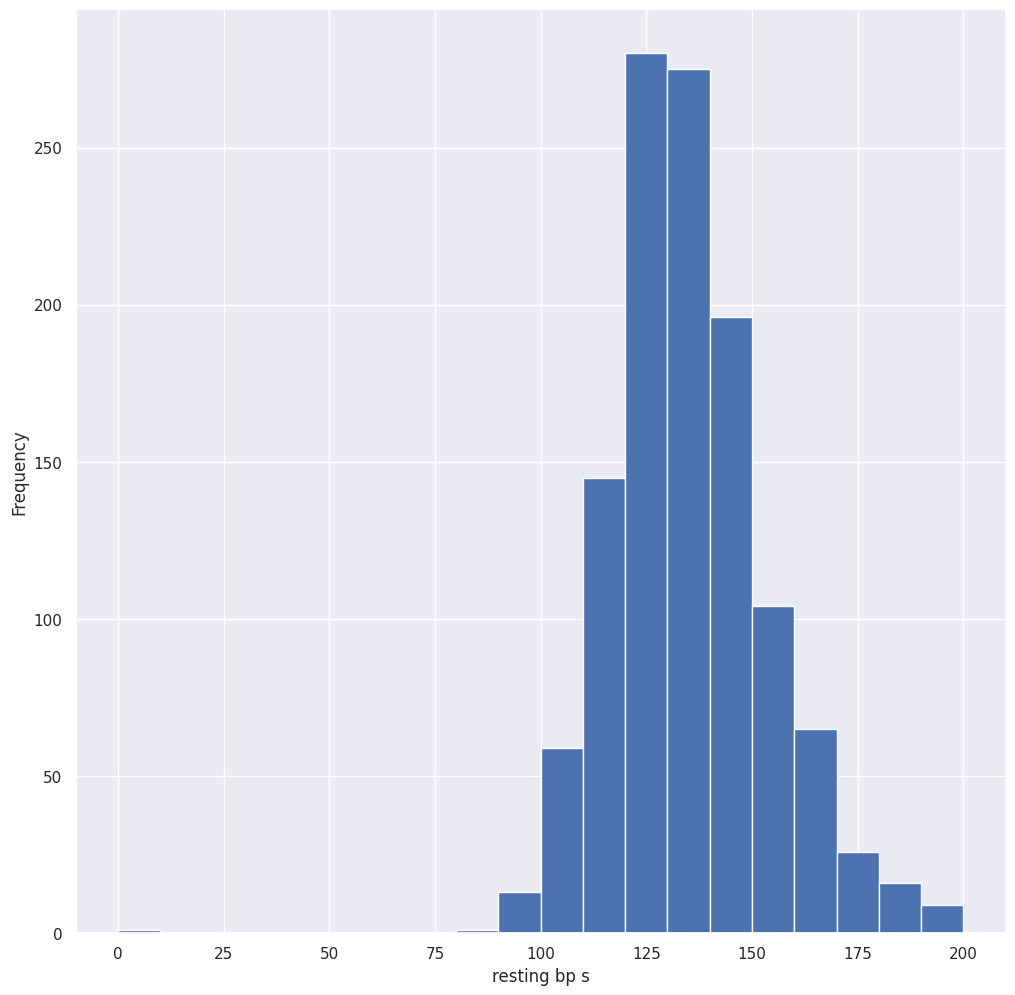

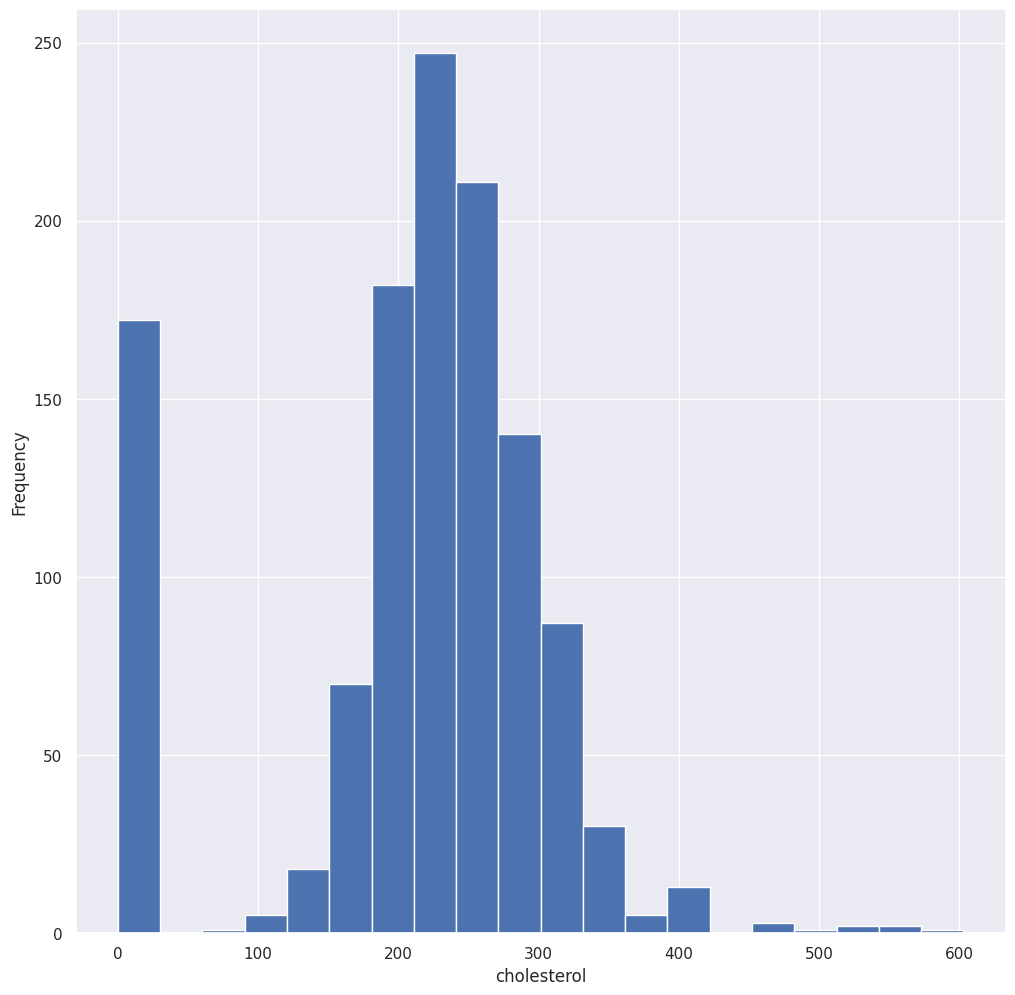

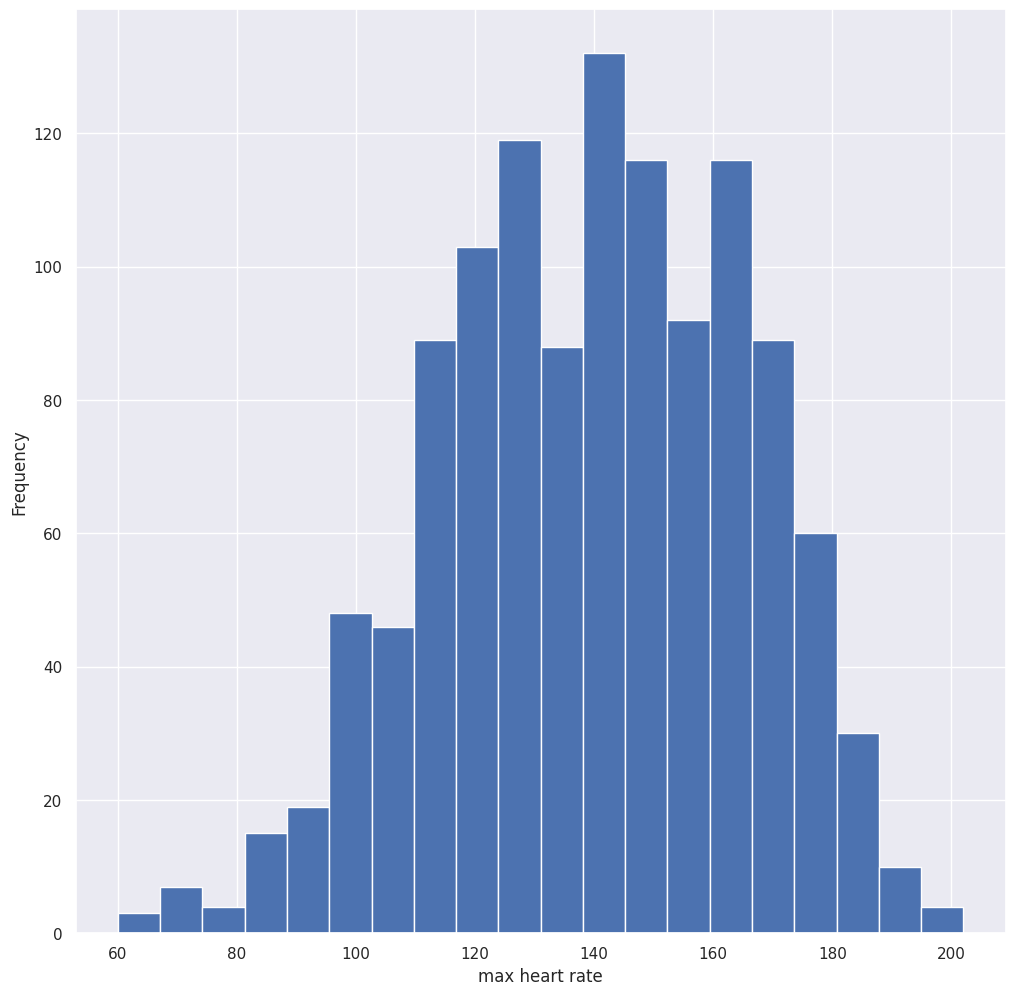

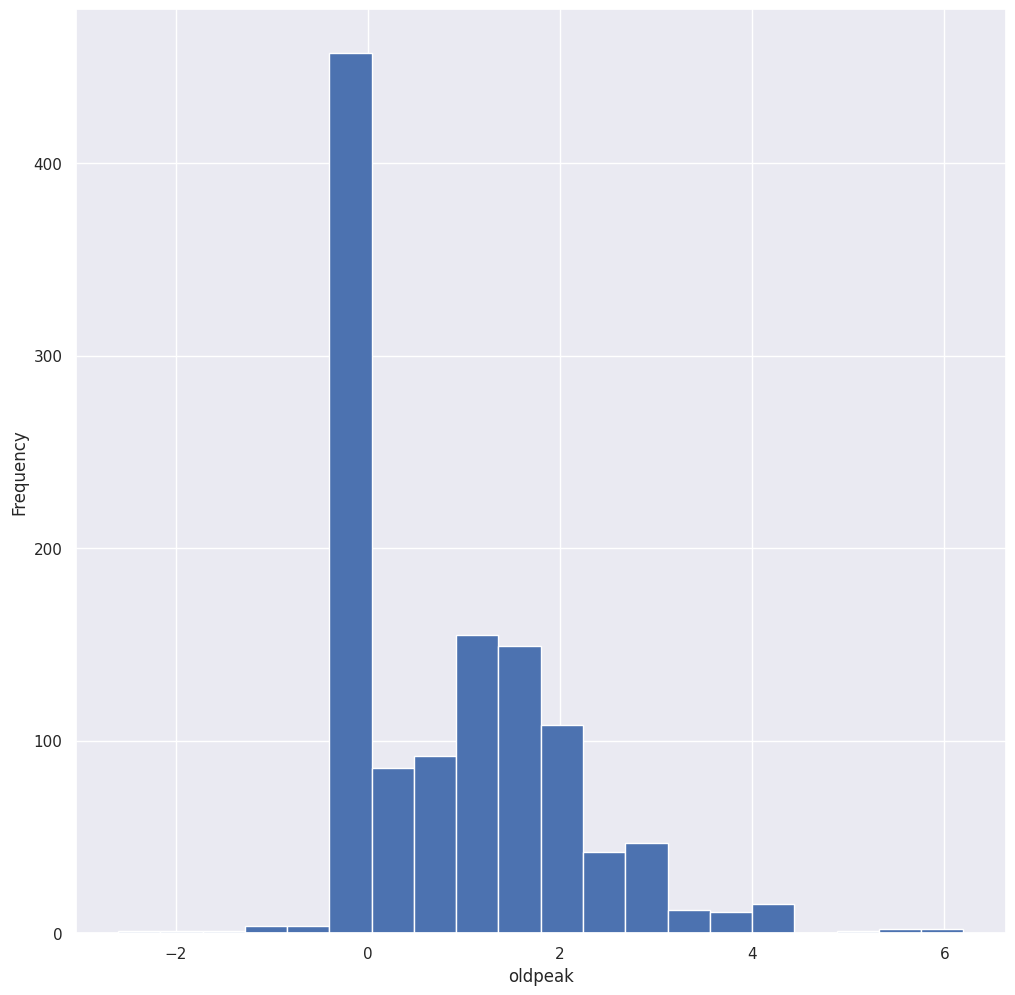

In [49]:
def cat_summary(dataframe,col_name,plot=True):
  print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),"Ratio":
                      100*dataframe[col_name].value_counts()/len(dataframe)}))

  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

print("\n\n############################## Categorical Features ##############################\n\n")

for col in cat_cols:
  cat_summary(df,col)
  print("\n")

print("\n\n############################## Numerical Features ##############################\n\n")

def hist_num_columns_show(dataframe, num_column):
  dataframe[num_column].hist(bins=20)
  plt.xlabel(num_column)
  plt.ylabel("Frequency")
  plt.show(block=True)

for num_col in num_cols:
  hist_num_columns_show(df,num_col)
  print("\n")

# **Using of Alternative Library | Plotly**

In [50]:
# age - heart disease
fig = px.histogram(df, x="age",y="target",color="age")
fig.show()

# **Relations Between Features**

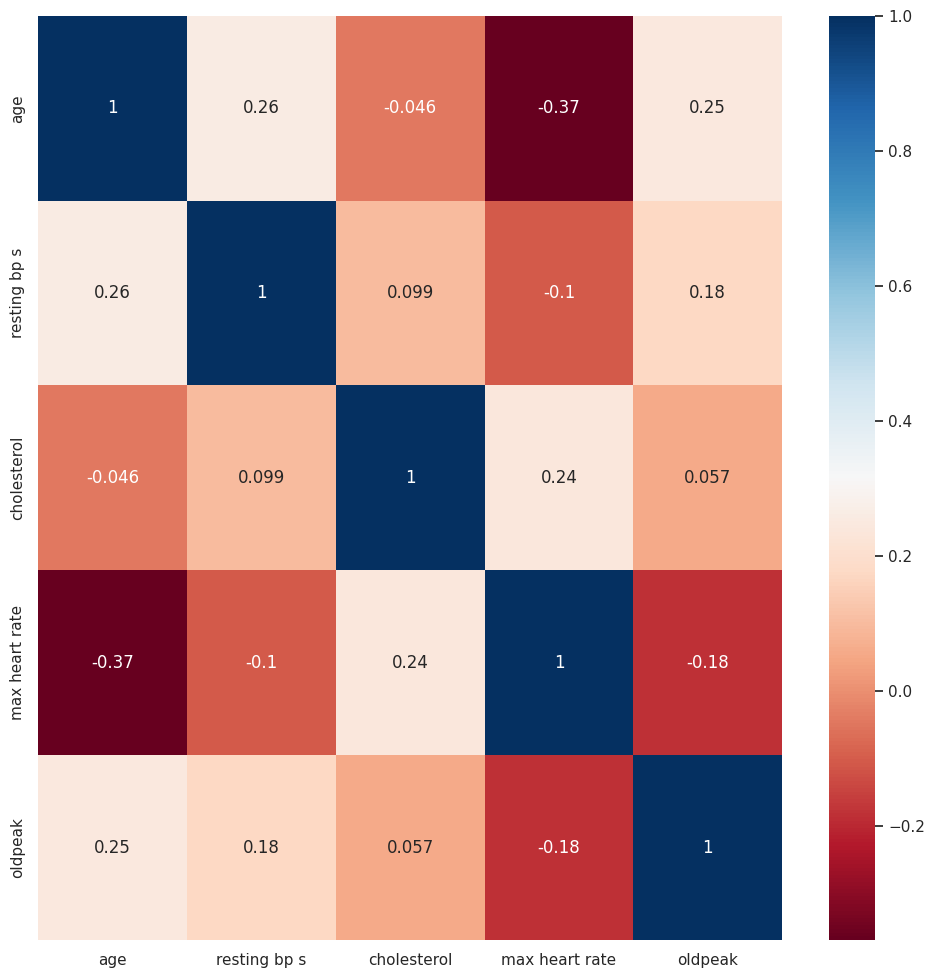

In [51]:
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

# **Feature Engineering**

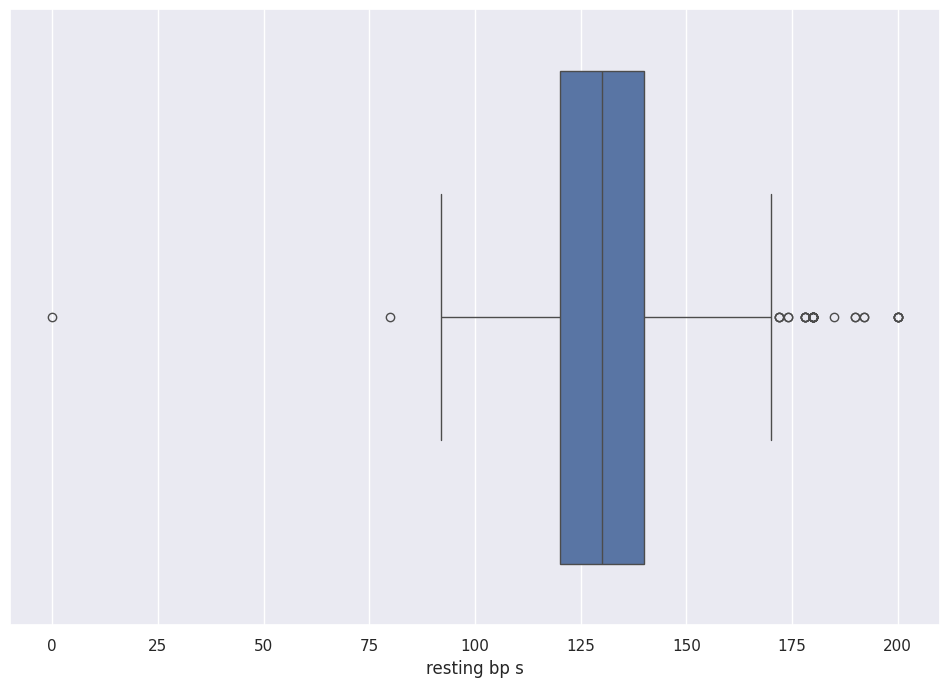

In [52]:
# Detecting of outlier

plt.figure(figsize=(12,8))
sns.boxplot(x=df["resting bp s"])
plt.show(block=True)

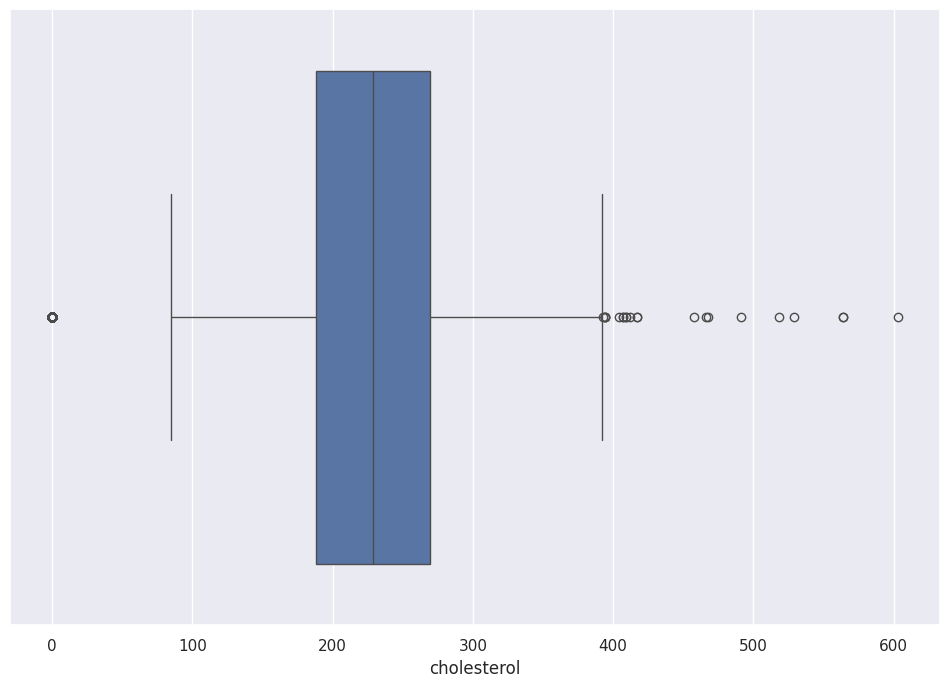

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df["cholesterol"])
plt.show(block=True)

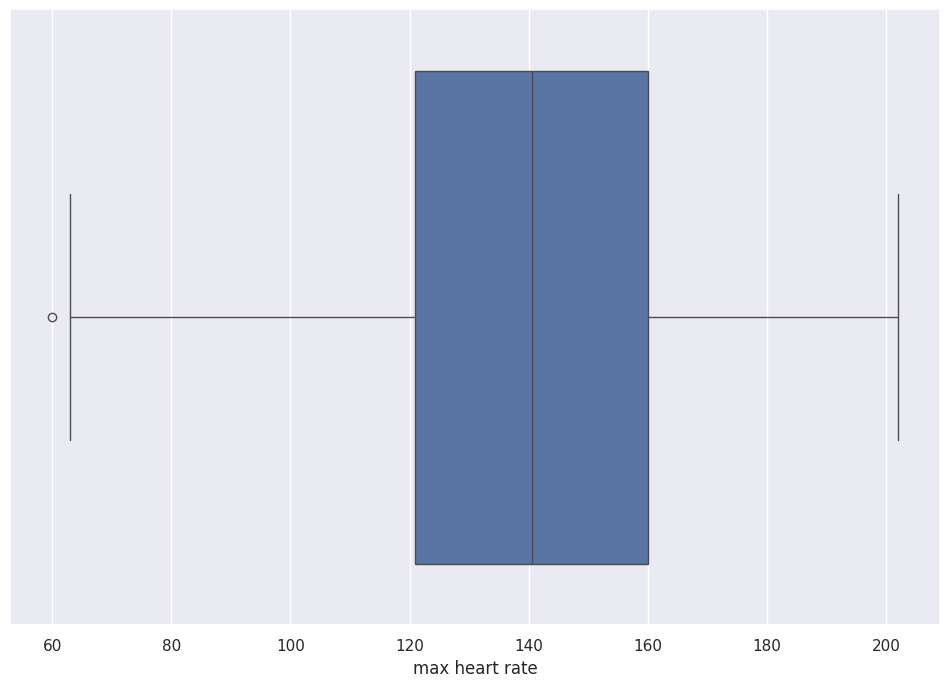

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df["max heart rate"])
plt.show(block=True)

In [55]:
# Lower and upper limit for any data to be outlier
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str,q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit


In [56]:
print("outlier threshold for resting bp s:")
outlier_thresholds(df,"resting bp s")


outlier threshold for resting bp s:


(90.0, 170.0)

In [57]:
print("outlier threshold for cholesterol:")
outlier_thresholds(df,"cholesterol")

outlier threshold for cholesterol:


(65.375, 392.375)

In [58]:
print("outlier threshold for max heart rate:")
outlier_thresholds(df,"max heart rate")

outlier threshold for max heart rate:


(62.5, 218.5)

In [59]:
def check_outlier(dataframe: pd.DataFrame, col_name: str) -> bool:
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any().any():
        return True
    else:
        return False

In [60]:
check_outlier(df ,"resting bp s")

True

In [61]:
check_outlier(df ,"cholesterol")

True

In [62]:
check_outlier(df ,"max heart rate")

True

# **Winsorization for Outliers**

In [63]:
df_cap = df.copy()

In [64]:
num_cols

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [65]:
def percentile_capping(df, cols, from_low, from_high):
  for col in cols:
    stats.mstats.winsorize(a=df[col], limits=(from_low,from_high), inplace=True)

In [82]:
percentile_capping(df_cap, num_cols,0.02,0.02) # we get %96 of the data , cut % 2 percent from low and high

In [83]:
df_cap.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.726050,0.763866,3.232773,131.731933,205.877311,0.213445,0.698319,140.134454,0.387395,0.861849,1.624370,0.528571
std,7.932256,0.424884,0.935480,14.807185,94.205161,0.409912,0.870359,21.945465,0.487360,0.900046,0.610459,0.499393
min,41.000000,0.000000,1.000000,110.000000,0.000000,0.000000,0.000000,106.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,65.000000,1.000000,4.000000,158.000000,306.000000,1.000000,2.000000,172.000000,1.000000,2.500000,3.000000,1.000000


In [84]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# **Visual Re-inspection of Outliers**

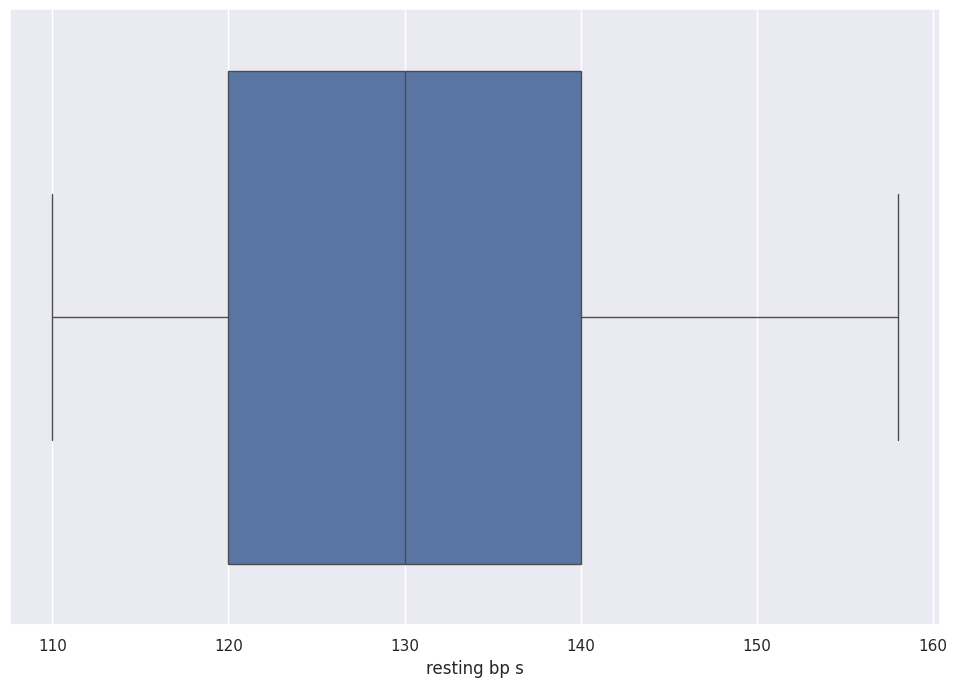

In [85]:
# Detecting of outlier

plt.figure(figsize=(12,8))
sns.boxplot(x=df_cap["resting bp s"])
plt.show(block=True)

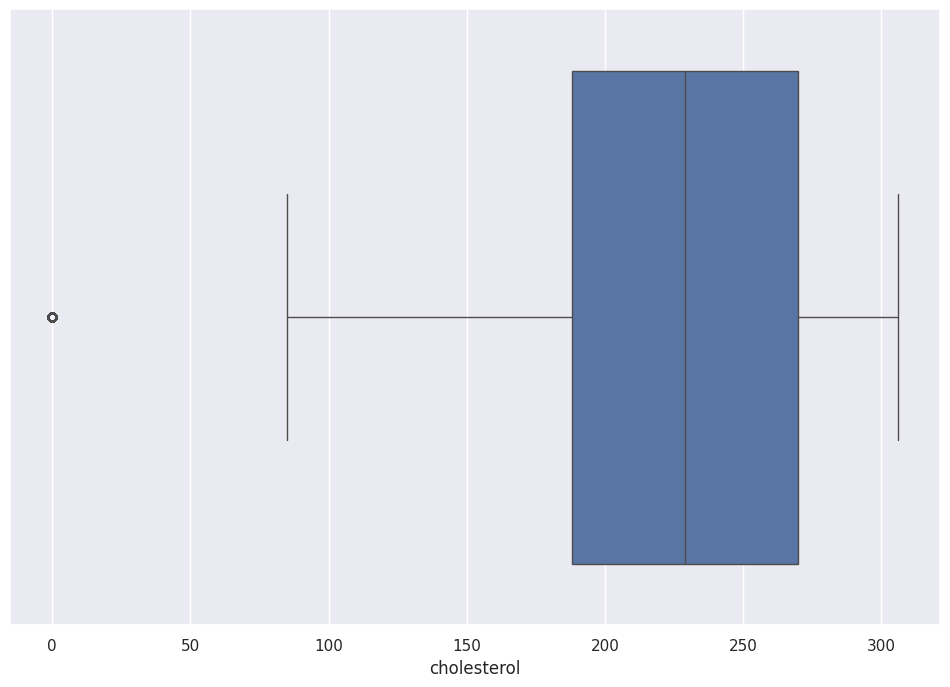

In [86]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_cap["cholesterol"])
plt.show(block=True)

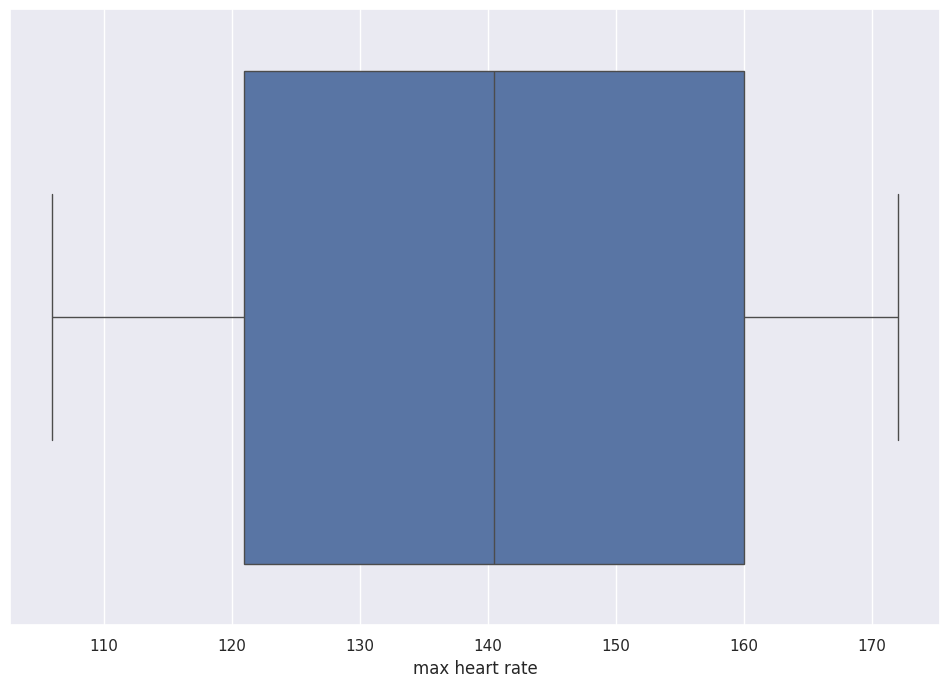

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_cap["max heart rate"])
plt.show(block=True)

# **Missing Values**

In [88]:
df_cap.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64